In [15]:
import pandas as pd, matplotlib.pyplot as plt, igraph as ig

In [16]:
data = pd.read_csv('units.csv')
set_13 = data[data['set'] == '13']
set_13 = set_13.dropna()

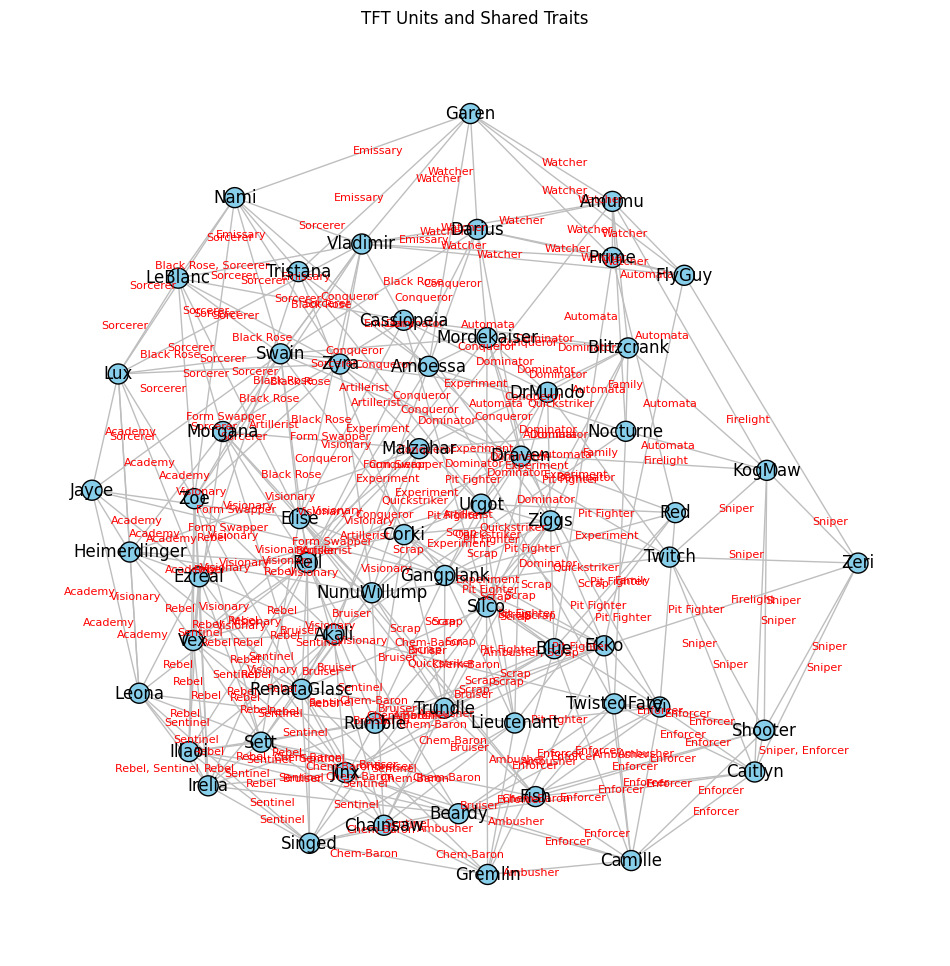

In [17]:
def create_trait_graph(units):
    g = ig.Graph()
    unit_names = units['name'].tolist()
    g.add_vertices(unit_names)
    
    edges = []
    edge_labels = []
    for i, unit1 in units.iterrows():
        for j, unit2 in units.iterrows():
            if i >= j:
                continue
            shared_traits = set(unit1['traits'].split(', ')).intersection(set(unit2['traits'].split(', ')))
            if shared_traits:
                edges.append((unit1['name'], unit2['name']))
                edge_labels.append(', '.join(shared_traits))
    
    g.add_edges(edges)
    g.es['label'] = edge_labels
    
    return g

def draw_graph(g):
    layout = g.layout('fr')
    fig, ax = plt.subplots(figsize=(12, 12))
    ig.plot(
        g,
        target=ax,
        layout=layout,
        vertex_label=g.vs['name'],
        vertex_size=20,
        vertex_color='skyblue',
        edge_width=1,
        edge_color='gray',
        edge_label=g.es['label'],
        edge_label_size=8,
        edge_label_color='red'
    )
    plt.title('TFT Units and Shared Traits')
    plt.show()

# Create the graph
g = create_trait_graph(set_13)

# Draw the graph
draw_graph(g)